# 1- Configurando o ambiente

In [2]:
!pip install ultralytics # Baixando dependências da ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 23.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 92.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 66.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 51.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 81.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

# 2- Importando bibliotecas

In [3]:
import tensorflow as tf
device_name = tf.test.gpu_device_name() # Verificando se há GPU disponível
print(device_name)

/device:GPU:0


In [4]:
import ultralytics
ultralytics.checks() # Checando se não há dependências

Ultralytics 8.3.130 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 41.6/112.6 GB disk)


In [7]:
from ultralytics import YOLO # Importando a lib do YOLO
from IPython.display import Image # Importando lib para poder plotar as imagens

# 3- Baixando dataset

In [6]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="KZGkhaI4uK1prto0EEJt")
project = rf.workspace("solo-z37vk").project("reconhece-reciclaveis")
version = project.version(3)
dataset = version.download("yolov11")


loading Roboflow workspace...
loading Roboflow project...


In [8]:
dataset.location # Checando onde foi salvo o dataset

'/content/reconhece-reciclaveis-3'

# 4- Treinando Modelo YOLO11 com um dataset customizado

In [9]:
!yolo task=detect mode=train data={dataset.location}/data.yaml model="yolo11n.pt" epochs=50 imgsz=640
# task: o tipo de tarefa que será realizada. Exemplo: Detect - Segment - Classify - Pose - OBB - Track
# mode: operação que vai ser feita. Exemplo: Train (treinamento) - Val (validação) - Predict (Realiza inferência/predição de imagens ou vídeos) - e outros que eu não to nem aí no momento
# model: modelo previamente treinando disponibilizado pela ultralytics. Exemplo: olhar no github ou no site deles para me poupar o trabalho de ter que listar isso
# epochs: define a quantidade de vezes que o algoritmo vai passar por ----> TODOS <---- os dados. Ou seja, se são 100 imagens e um epoch=2, significa que no total ele vai passar por 200
#        imagens, usando os novos pesos que foram aprendidos
# imgsz: ordem para redimensionar as imagens para a quantidade de pixels definida

100% 5.35M/5.35M [00:00<00:00, 108MB/s]
Ultralytics 8.3.130 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/reconhece-reciclaveis-3/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=1

# 5- Examinando resultado do treinamento

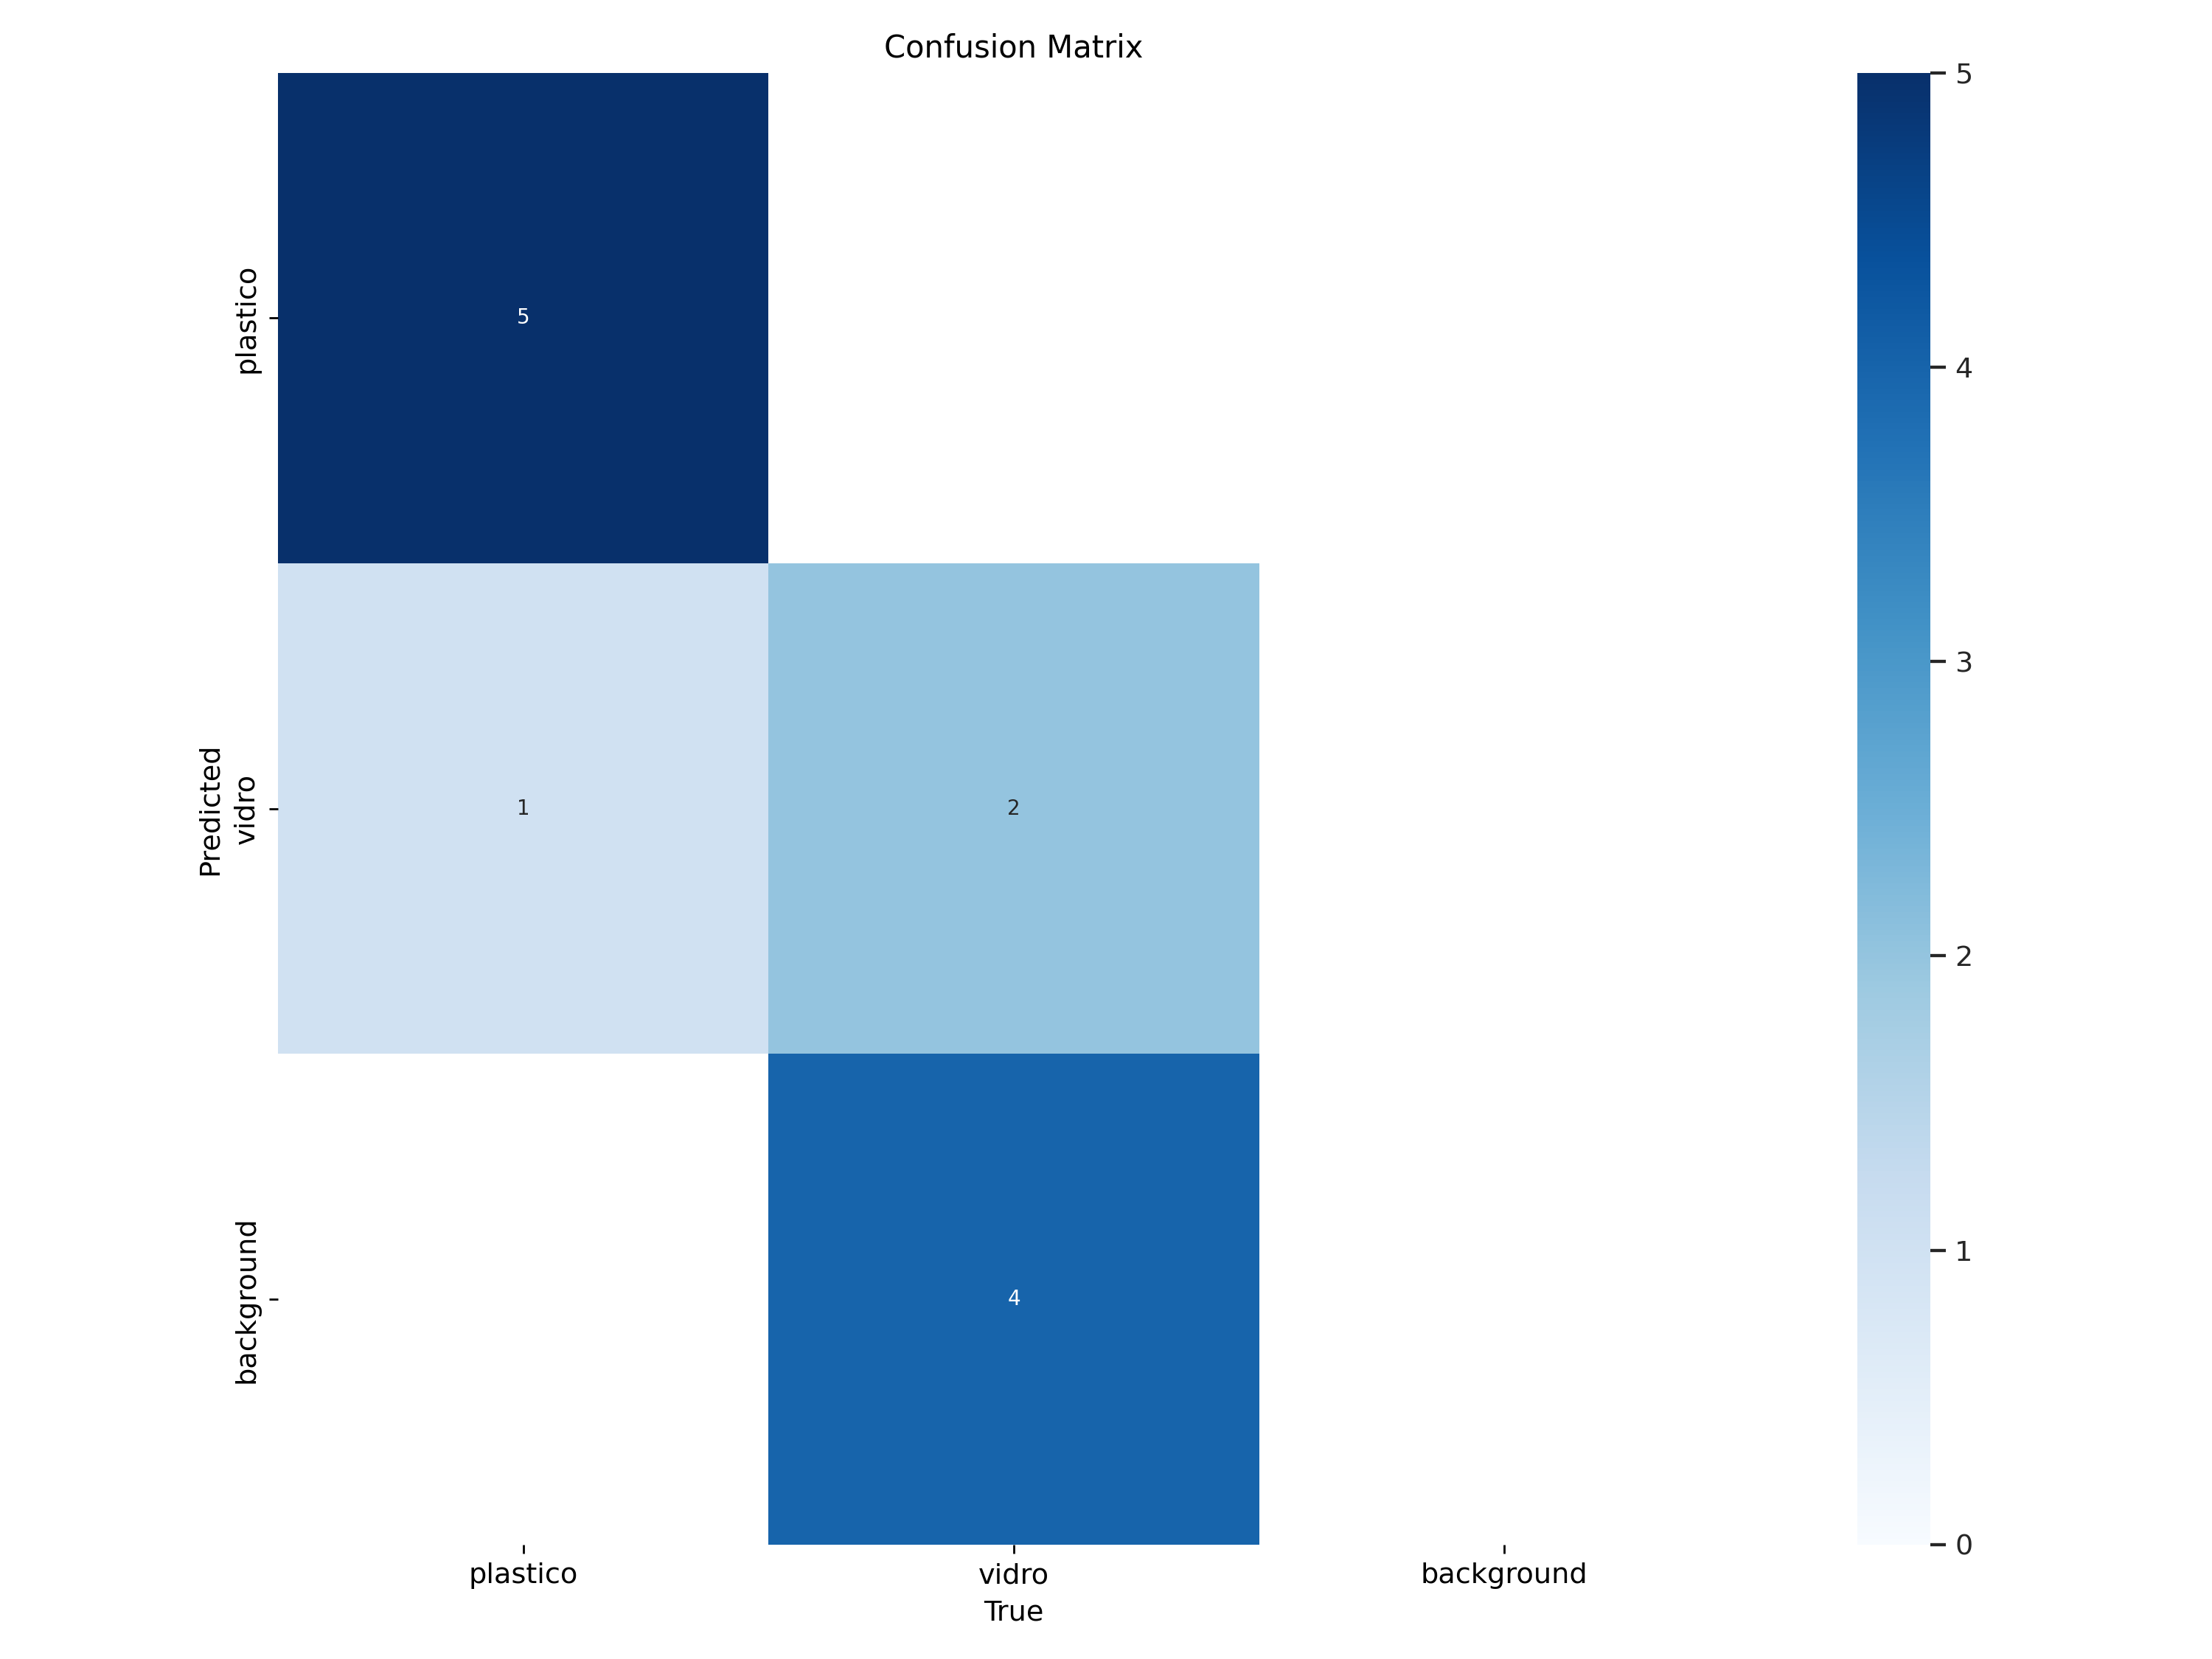

In [10]:
Image("/content/runs/detect/train/confusion_matrix.png", width=1000)

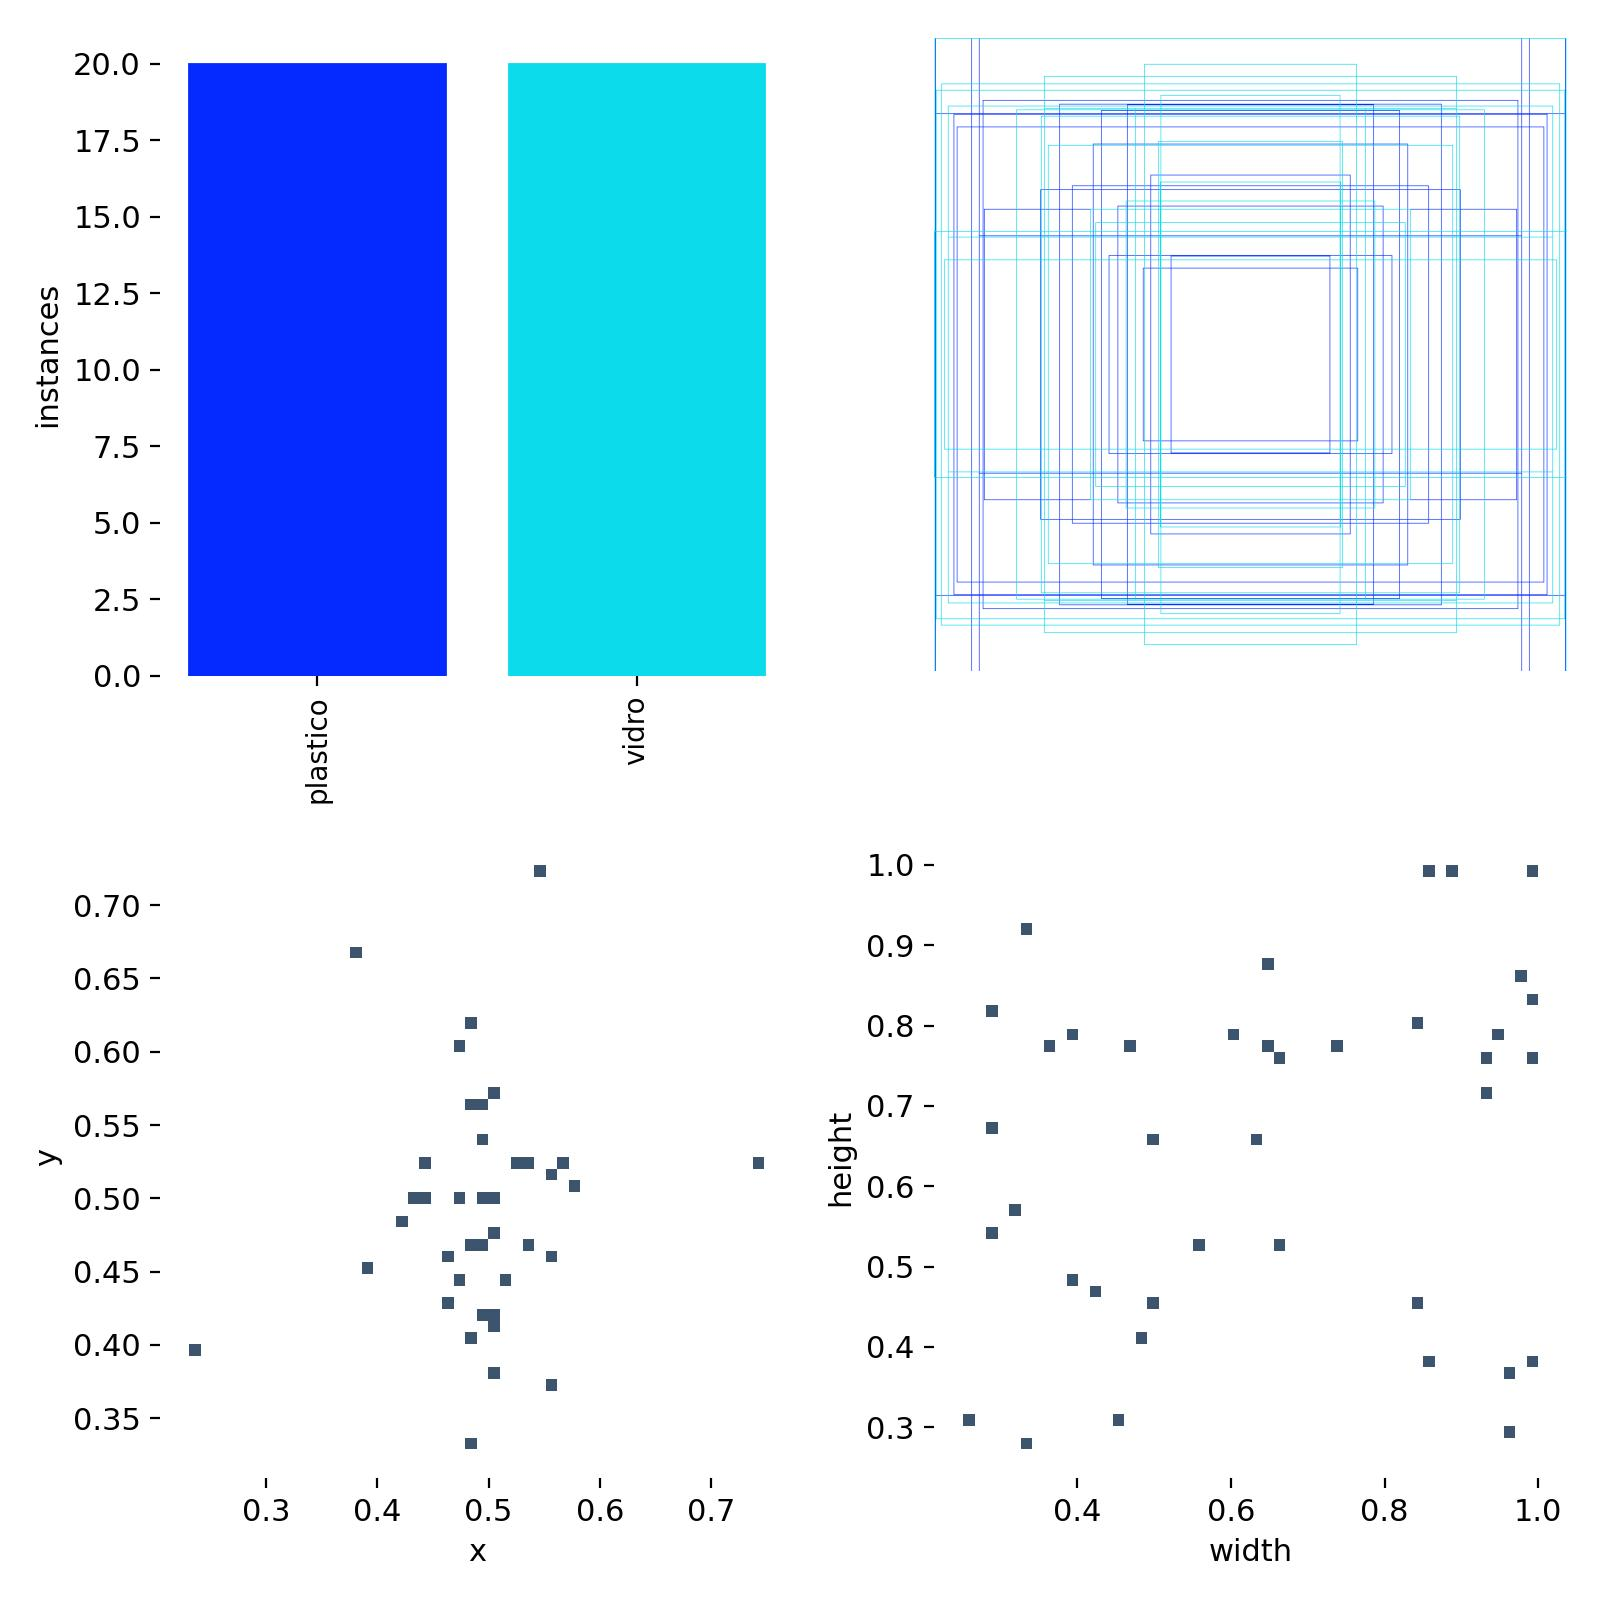

In [11]:
Image("/content/runs/detect/train/labels.jpg", width=1000)

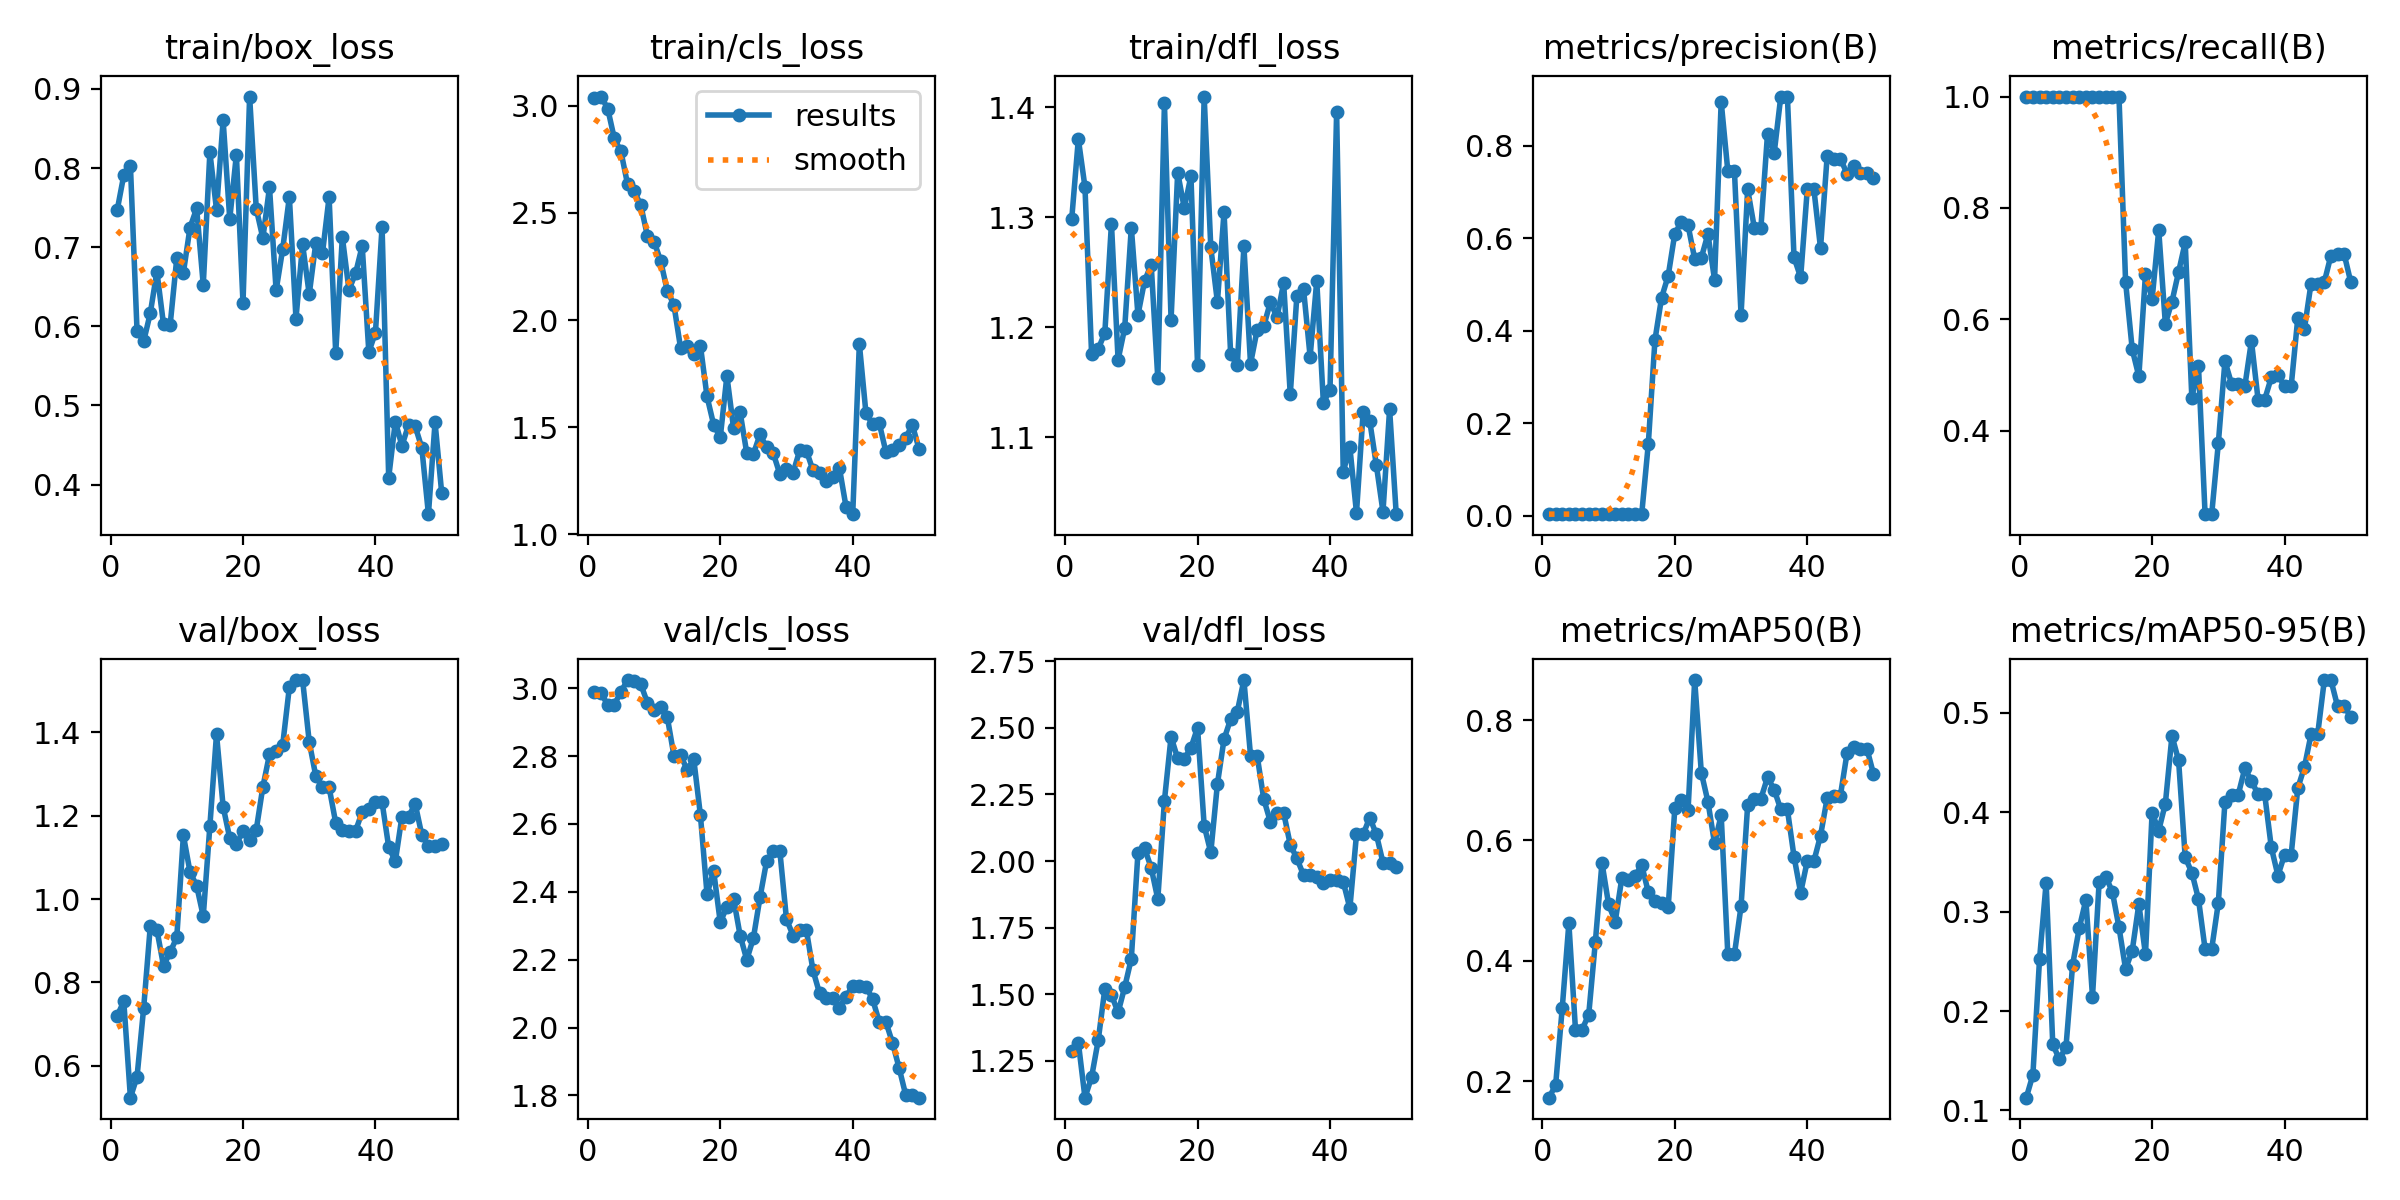

In [12]:
Image("/content/runs/detect/train/results.png", width=1000)

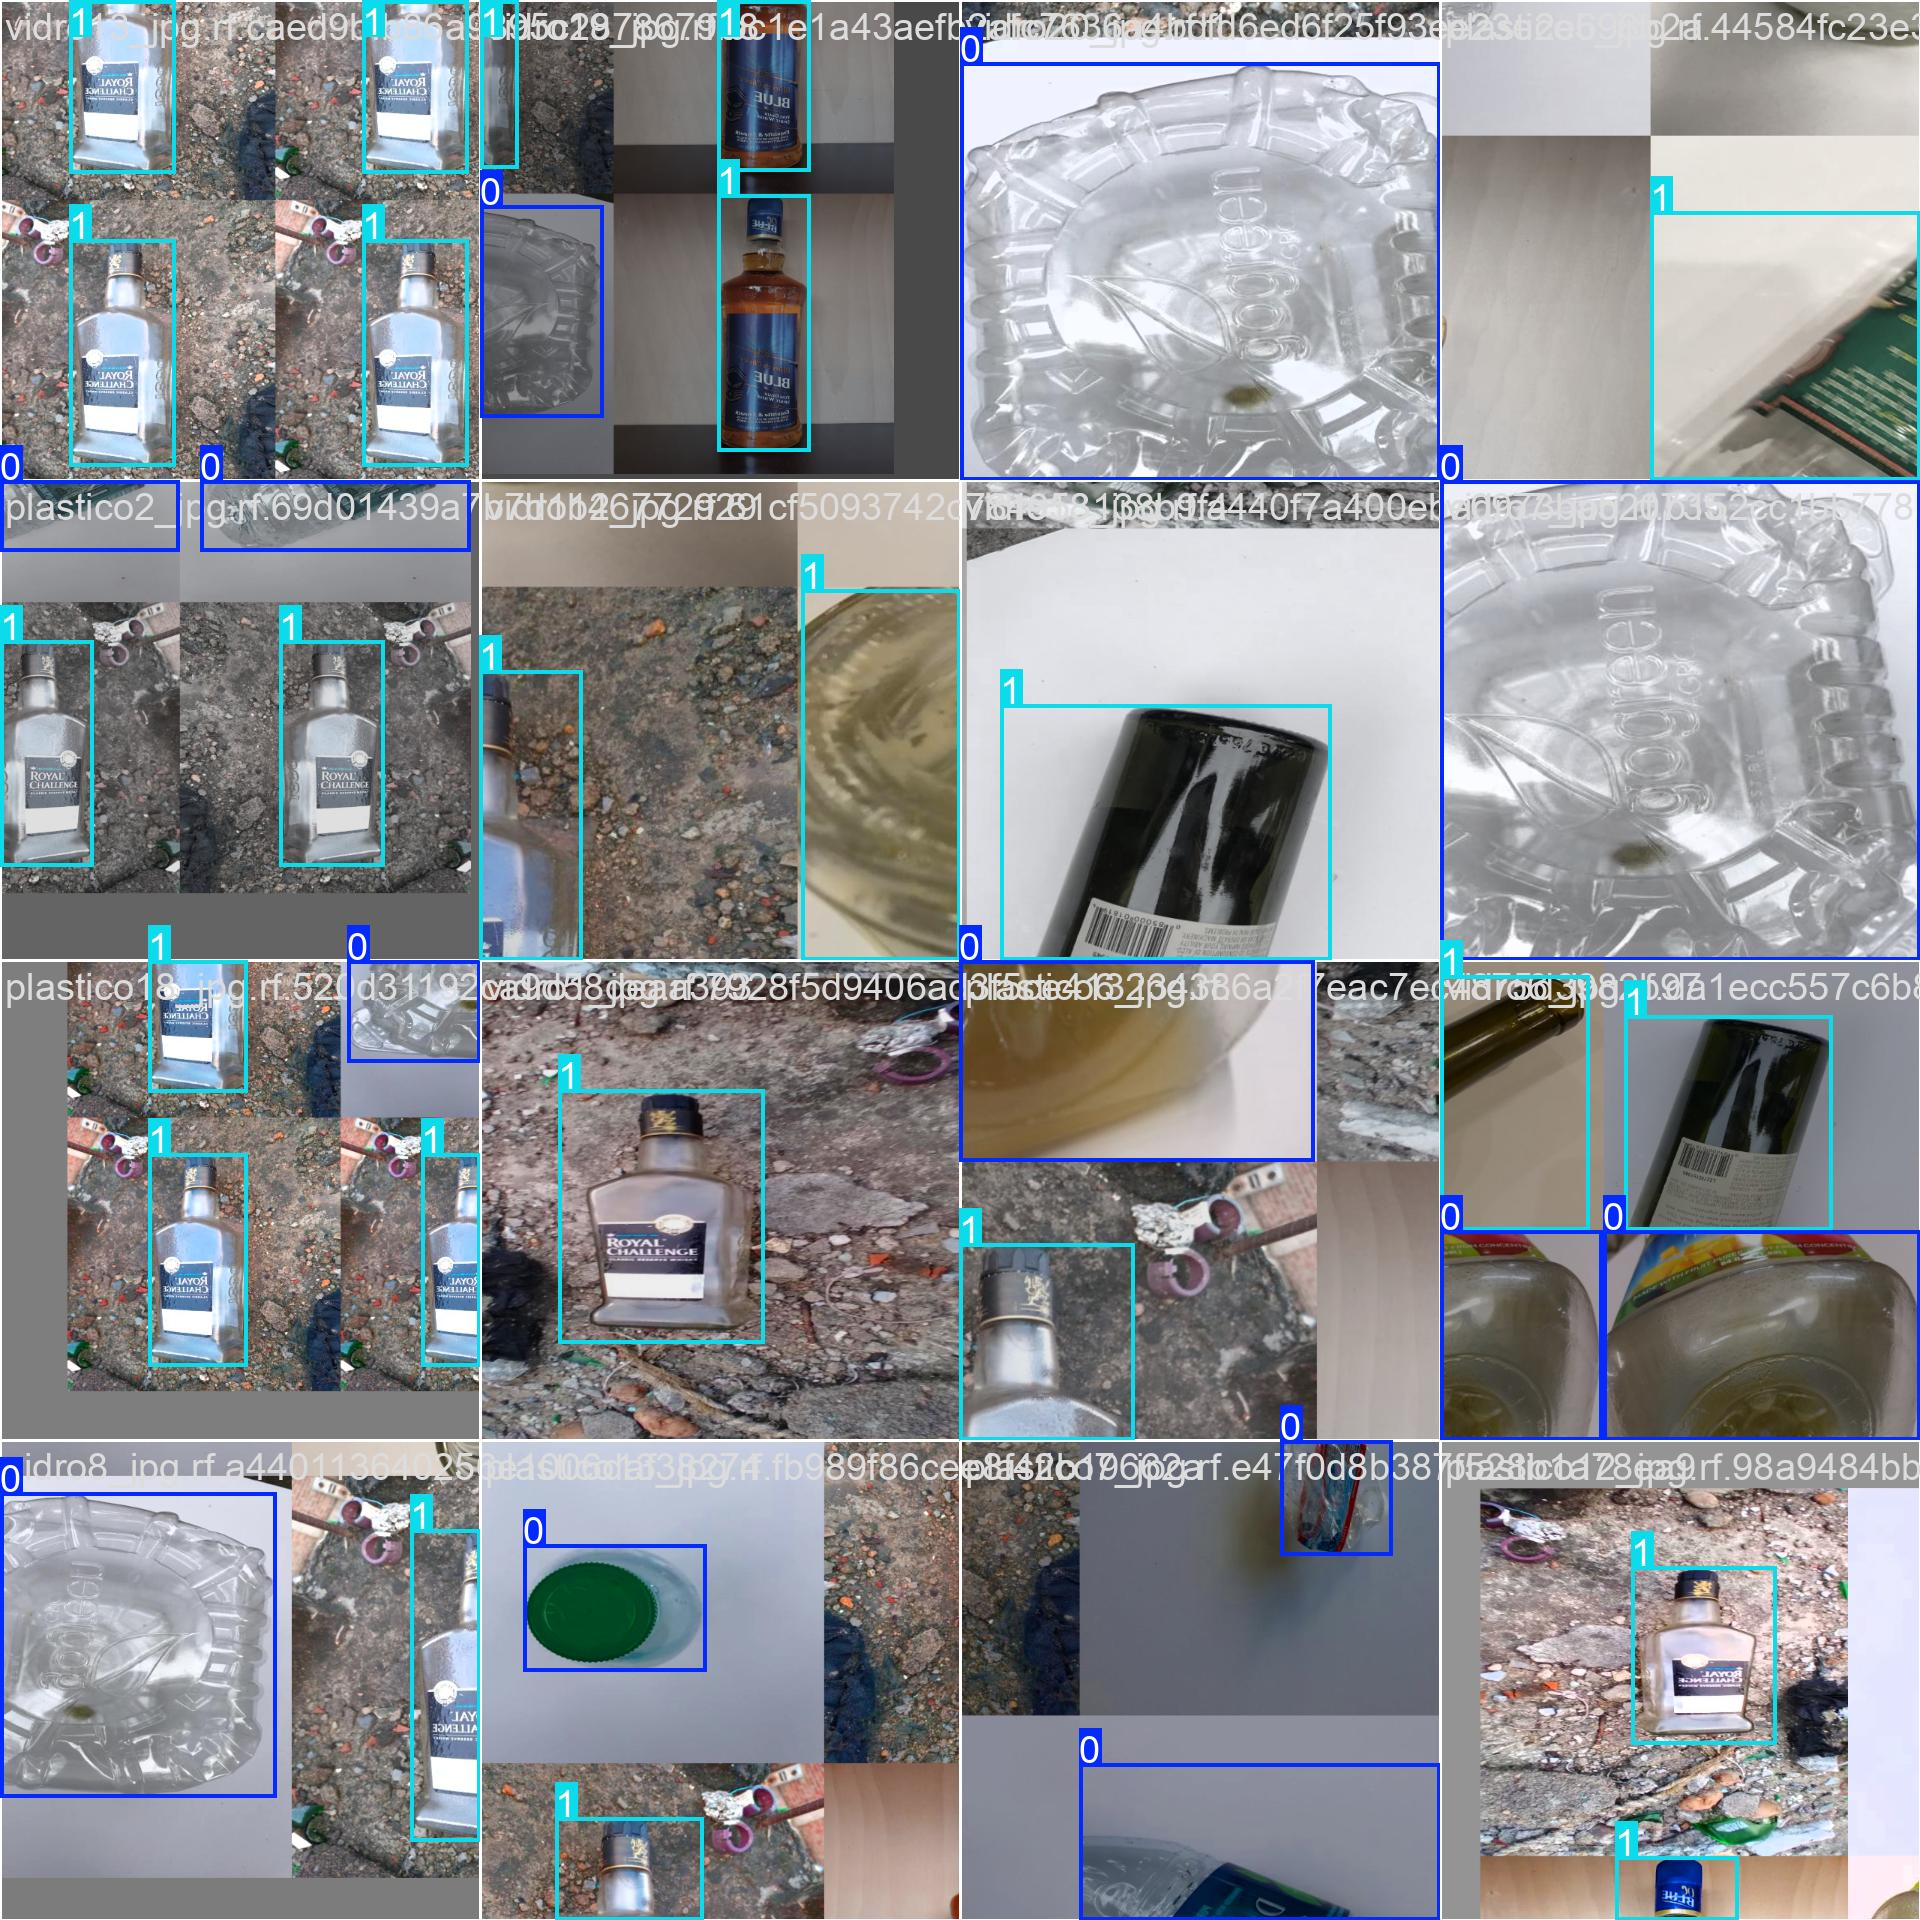

In [13]:
Image("/content/runs/detect/train/train_batch0.jpg", width=1000)

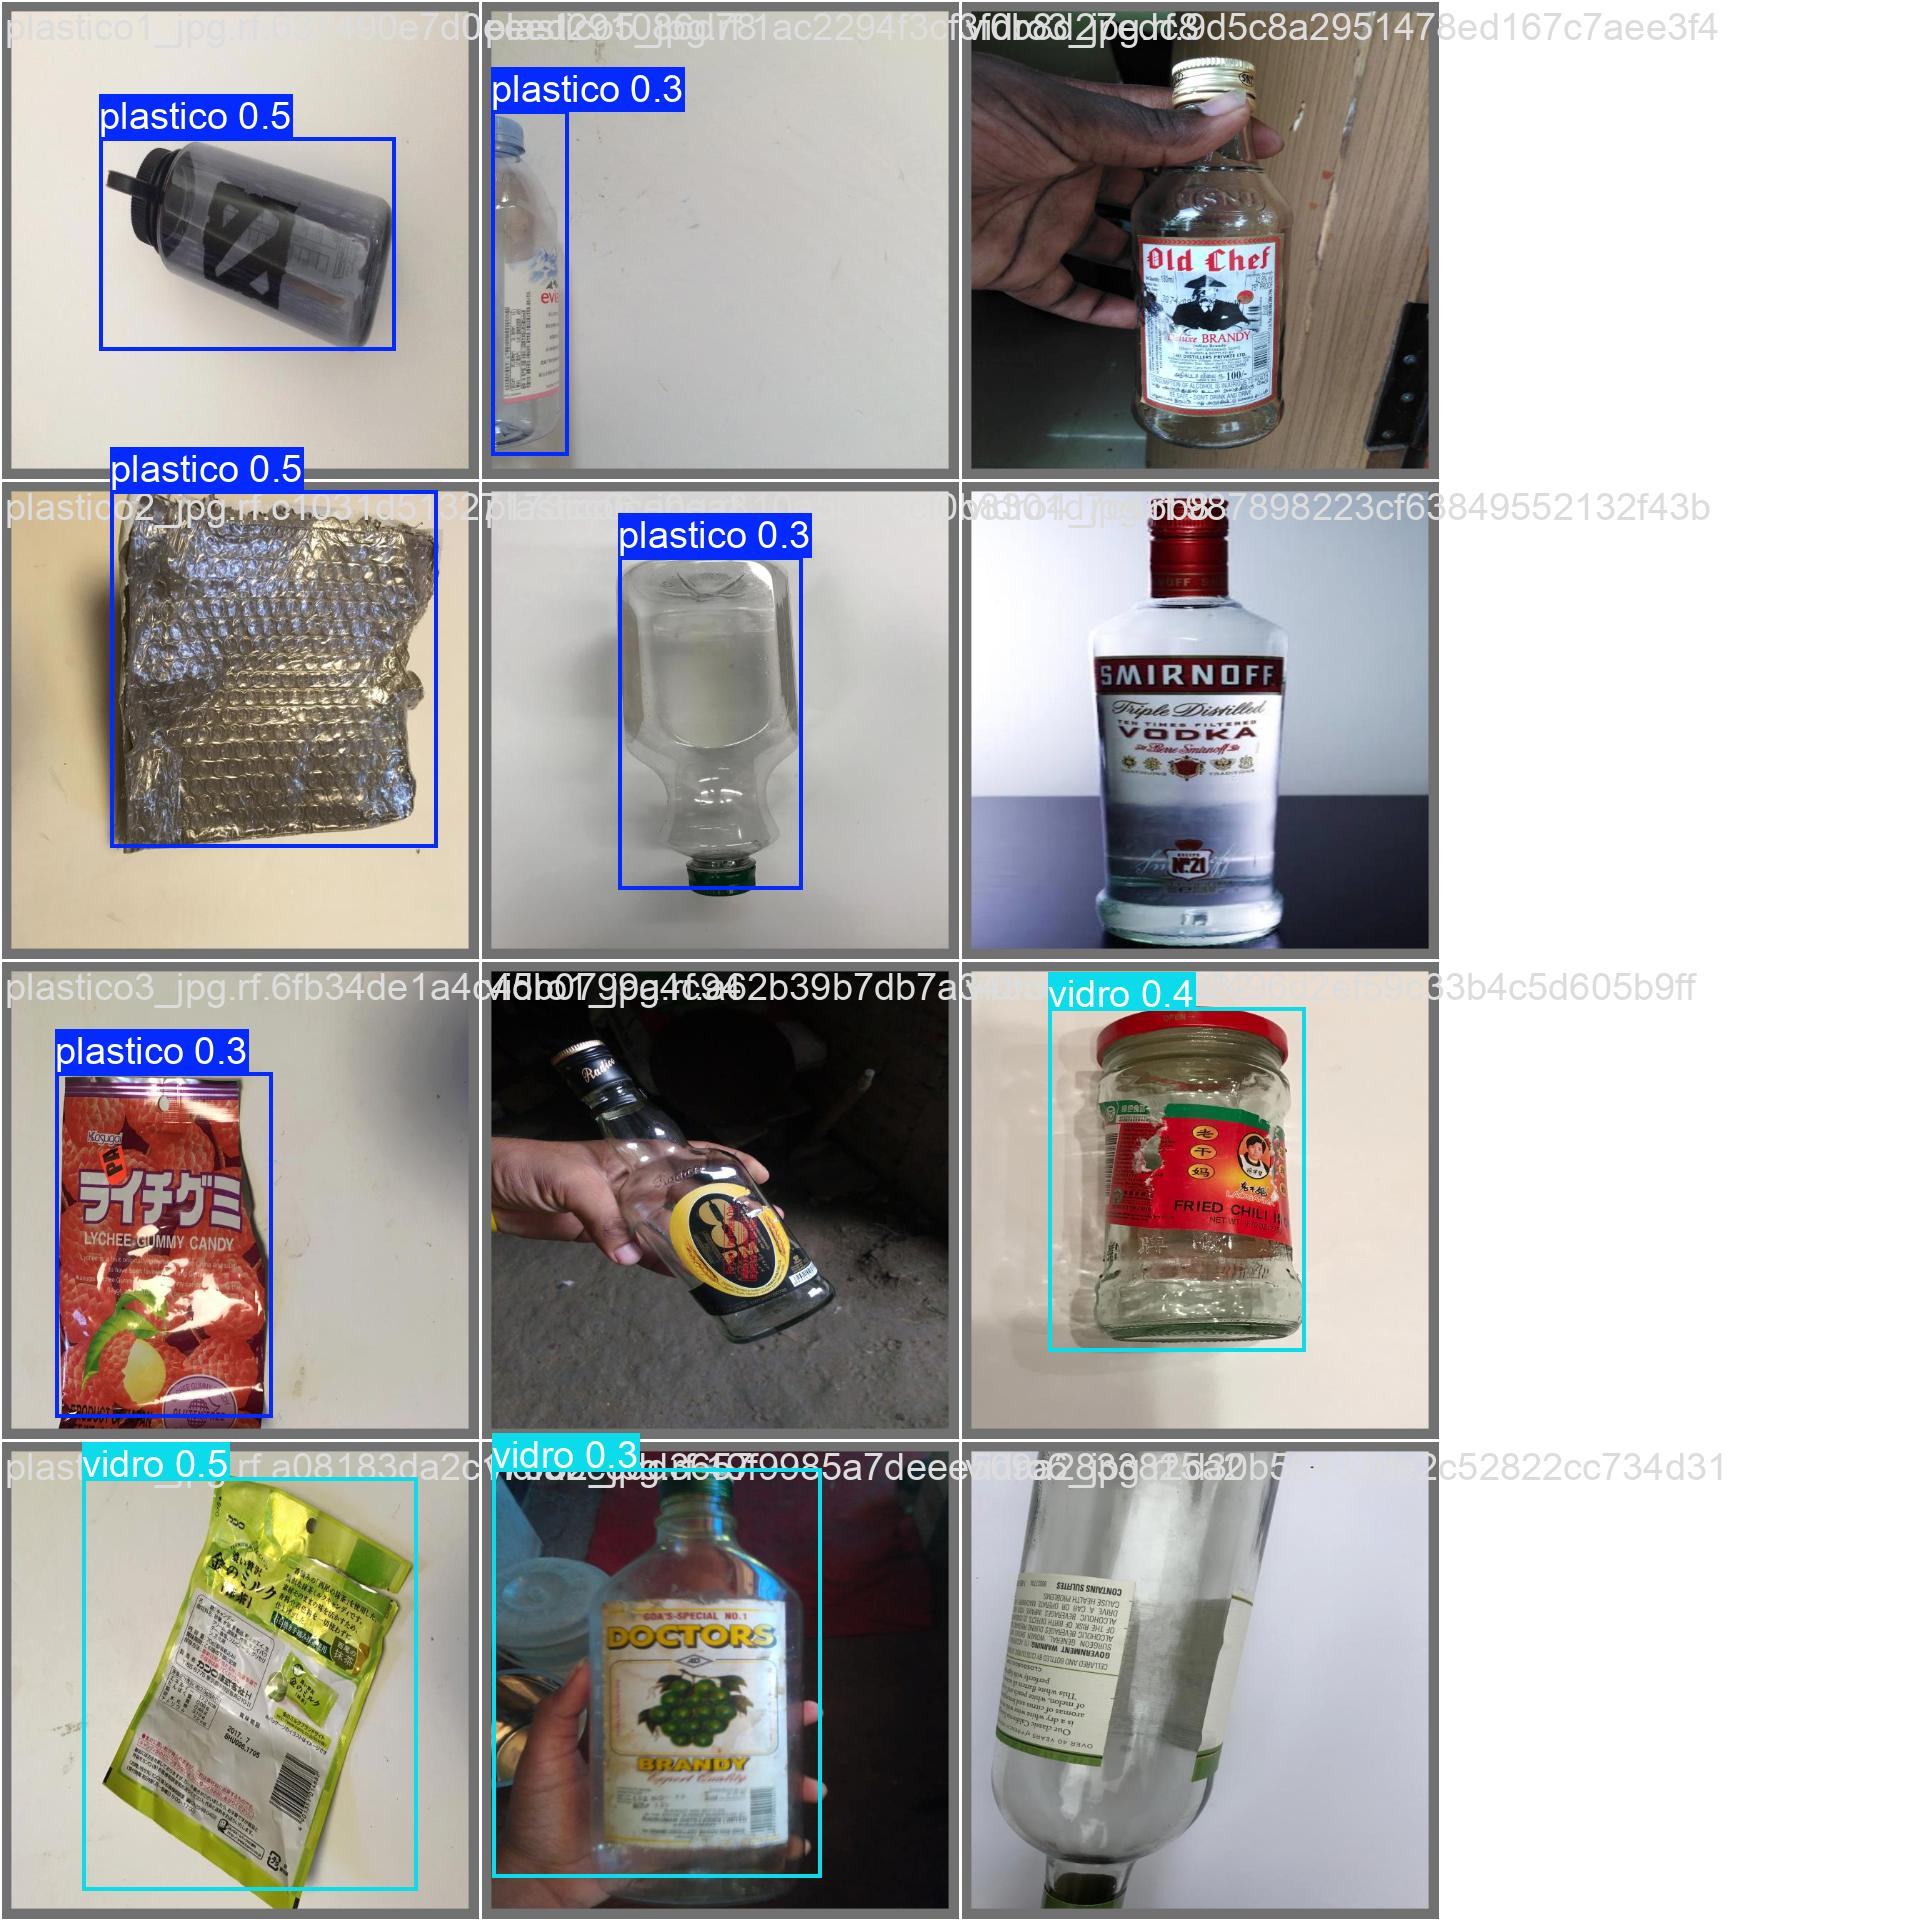

In [14]:
Image("/content/runs/detect/train/val_batch0_pred.jpg", width=1000)

# 6- Validar o Modelo Ajustado

In [15]:
!yolo task=detect mode=val model="/content/runs/detect/train/weights/best.pt" data={dataset.location}/data.yaml

Ultralytics 8.3.130 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1802.4±415.4 MB/s, size: 44.3 KB)
val: Scanning /content/reconhece-reciclaveis-3/valid/labels.cache... 12 images, 0 backgrounds, 0 corrupt: 100% 12/12 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 1/1 [00:00<00:00,  2.27it/s]
                   all         12         12      0.755      0.714      0.755      0.535
              plastico          6          6      0.847      0.929      0.972      0.801
                 vidro          6          6      0.663        0.5      0.538      0.269
Speed: 0.2ms preprocess, 8.5ms inference, 0.0ms loss, 15.4ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


# 7- Inferência com Modelo Personalizado em Imagens

In [16]:
!yolo task=detect mode=predict model="/content/runs/detect/train/weights/best.pt" conf=0.25 source={dataset.location}/test/images

Ultralytics 8.3.130 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs

image 1/12 /content/reconhece-reciclaveis-3/test/images/58587266383783041e6df198_Plastic-Bottles-image-Public-page_jpg.rf.5812268d0fab3aa464b78f0e4d252d99.jpg: 640x640 (no detections), 14.0ms
image 2/12 /content/reconhece-reciclaveis-3/test/images/GettyImages-110129542_webp.rf.06a9597796f679dadfa1233c968e8788.jpg: 640x640 (no detections), 9.1ms
image 3/12 /content/reconhece-reciclaveis-3/test/images/HDPE-botellas-1024x699_jpg.rf.6238e8b3328b190e983e9c705702cb29.jpg: 640x640 1 vidro, 8.4ms
image 4/12 /content/reconhece-reciclaveis-3/test/images/OIP_jpg.rf.1ce7696f1abd7d870eb88c1e0814af43.jpg: 640x640 (no detections), 8.9ms
image 5/12 /content/reconhece-reciclaveis-3/test/images/OIP_jpg.rf.1ef7a8a311159e6ef85e5de4842e6378.jpg: 640x640 1 plastico, 11.3ms
image 6/12 /content/reconhece-reciclaveis-3/test/images/OIP_jpg.rf.4271

In [30]:
import glob
import os
from IPython.display import Image as IPyImage, display

# Cada predição gera um novo diretório, esse código pega o último diretório gerado (a predição mais recente) e os exibe com o tamanho de 600px de largura
latest_folder = max(glob.glob('/content/runs/detect/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[1:4]:
      display(IPyImage(filename=img, width=600))
      print("\n")

In [21]:
!gdown "https://thumbs.dreamstime.com/b/saco-de-pl%C3%A1stico-amassado-em-polietileno-sobre-fundo-verde-contamina%C3%A7%C3%A3o-do-planeta-transparente-res%C3%ADduo-zero-conceito-208138183.jpg" -O imagem_teste.jpg # Baixando imagem da internet

Downloading...
From: https://thumbs.dreamstime.com/b/saco-de-pl%C3%A1stico-amassado-em-polietileno-sobre-fundo-verde-contamina%C3%A7%C3%A3o-do-planeta-transparente-res%C3%ADduo-zero-conceito-208138183.jpg
To: /content/imagem_teste.jpg
100% 38.0k/38.0k [00:00<00:00, 40.4MB/s]


In [22]:
!yolo task=detect mode=predict model="/content/runs/detect/train/weights/best.pt" conf=0.25 source=imagem_teste.jpg save=True

Ultralytics 8.3.130 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs

image 1/1 /content/imagem_teste.jpg: 448x640 1 plastico, 46.9ms
Speed: 3.3ms preprocess, 46.9ms inference, 142.6ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict4
💡 Learn more at https://docs.ultralytics.com/modes/predict


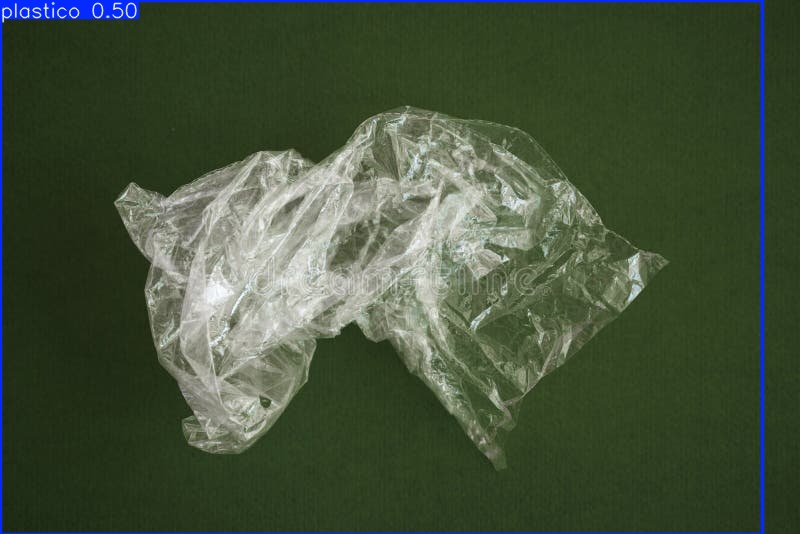

In [27]:
Image("/content/runs/detect/predict4/imagem_teste.jpg", width=1000)